In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

2018-05-03 20:39:51,115 : INFO : 'pattern' package not found; tag filters are not available for English
/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [3]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [4]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [5]:
%%time
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english')
train_data_features = tf_vect.fit_transform(train_data.text)

CPU times: user 17min 35s, sys: 1.84 s, total: 17min 37s
Wall time: 17min 37s


In [9]:
print(len(tf_vect.get_feature_names()))
tf_vect.get_feature_names()[2000:2020]

183013


["'tiger",
 "'tight",
 "'tiki",
 "'til",
 "'till",
 "'time",
 "'timely",
 "'tine",
 "'tini",
 "'tinis",
 "'tiny",
 "'tip",
 "'tips",
 "'tire",
 "'tis",
 "'titties",
 "'to",
 "'to-do",
 "'to-go",
 "'to-try"]

In [10]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=3, C=1e5)
logreg = logreg.fit(train_data_features, train_data.stars)

/home/nikita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(self.n_jobs))


CPU times: user 2h 23min 49s, sys: 3min 2s, total: 2h 26min 51s
Wall time: 1h 38min 11s


accuracy 0.6114183628865195
confusion matrix
 [[10601  1652   823   529   793]
 [ 2557  2275  1990  1076   724]
 [  961  1539  4063  4028  1749]
 [  517   734  2486 10750 10176]
 [  630   447  1128  6353 36653]]
(row=expected, col=predicted)
CPU times: user 1min 57s, sys: 28 ms, total: 1min 57s
Wall time: 1min 57s


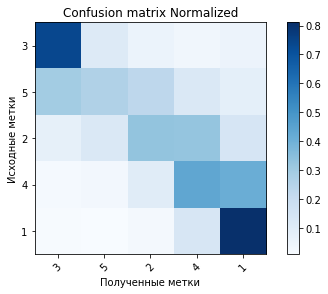

In [11]:
%%time
predict(tf_vect, logreg, test_data)